In [56]:
#baris code di bawah ini digunakan untuk mengimport library yang akan di gunakan untuk mengolah citra, angka, dll
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# baris code di bawah ini digunakan untuk membaca image dan menyimpannya dalam variabel yang sudah disiapkan (image1 sampai image5)
image1=plt.imread("dataset/color_segmented/BASOPHIL.png")
image2=plt.imread("dataset/color_segmented/EOSINOPHIL.png")
image3=plt.imread("dataset/color_segmented/LYMPHOCYTE.png")
image4=plt.imread("dataset/color_segmented/MONOCYTE.png")
image5=plt.imread("dataset/color_segmented/NEUTROPHIL.png")

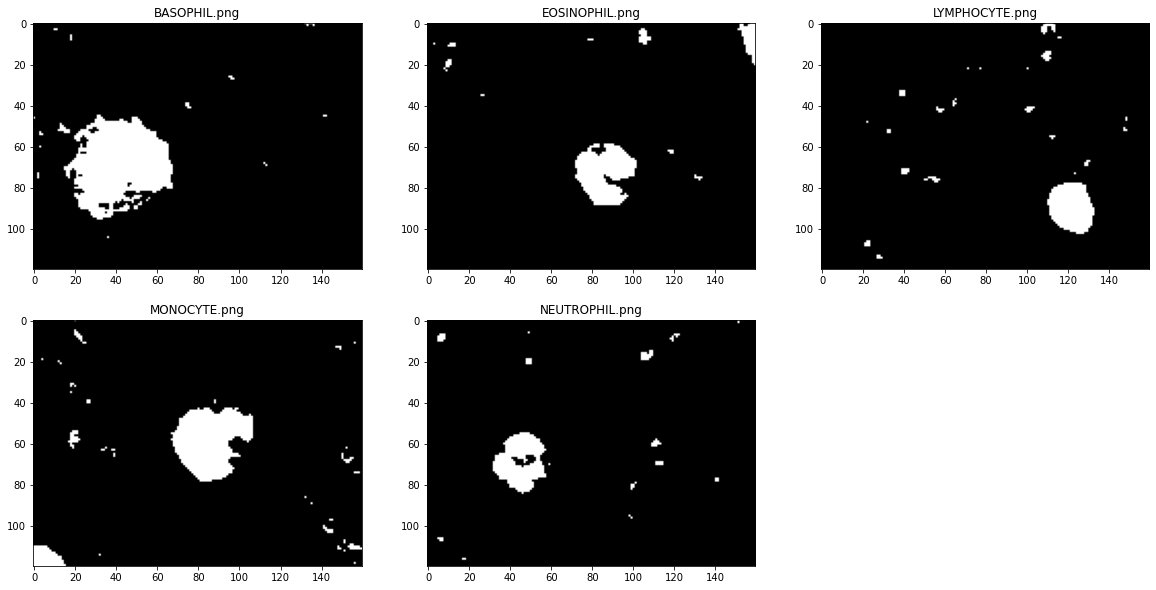

In [58]:
# menampilkan semua citra yang disimpan dalam variabel image1 sampai image5
plt.figure(figsize=(20,10)) # mengatur ukuran dari tampilan citra
plt.subplot(231) # mengatur posisi dari penampilan citra yaitu elemen ke 1 dari tabel 1baris dengan 5kolom
plt.title("BASOPHIL.png") # memberikan judul pada citra yang akan di tampilkan yaitu dengan judul "BASOPHIL.png"
plt.imshow(image1,"gray") # menampilkan image1 dengan cmap "gray"
plt.subplot(232) # mengatur posisi dari penampilan citra yaitu elemen ke 2 dari tabel 1baris dengan 5kolom
plt.title("EOSINOPHIL.png")
plt.imshow(image2,"gray") # menampilkan image2 dengan cmap "gray"
plt.subplot(233) # mengatur posisi dari penampilan citra yaitu elemen ke 3 dari tabel 1baris dengan 5kolom
plt.title("LYMPHOCYTE.png")
plt.imshow(image3,"gray") # menampilkan image3 dengan cmap "gray"
plt.subplot(234) # mengatur posisi dari penampilan citra yaitu elemen ke 4 dari tabel 1baris dengan 5kolom
plt.title("MONOCYTE.png") 
plt.imshow(image4,"gray") # menampilkan image4 dengan cmap "gray"
plt.subplot(235) # mengatur posisi dari penampilan citra yaitu elemen ke 5 dari tabel 1baris dengan 5kolom
plt.title("NEUTROPHIL.png")
plt.imshow(image5,"gray") # menampilkan image5 dengan cmap "gray"

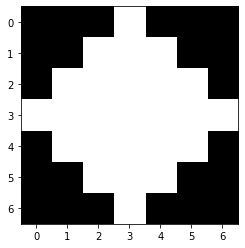

In [59]:
# code berikut adalah deklarasi kernel yang akan digunakan untuk melakukan dilasi dan operasi-operasi lainnya
kernel=np.array([(0,0,0,1,0,0,0),
                 (0,0,1,1,1,0,0),
                 (0,1,1,1,1,1,0),
                 (1,1,1,1,1,1,1),
                 (0,1,1,1,1,1,0),
                 (0,0,1,1,1,0,0),
                 (0,0,0,1,0,0,0),])
plt.imshow(kernel,"gray") # menampilkan bentuk kernel(strukturing elemen) yang sudah dideklarasikan sebelumnya

In [60]:

# baris code dibawah ini digunakan untuk mendeklarasikan fungsi dilasi yang akan digunakan untuk melakukan proses dilasi pada image
def dilasi(image,kernel): # baris code ini adalah deklarasi nama fungsi dan parameter input yang dibutuhkan untuk menghasilkan output
                            # dimana input yang dibutuhkan adalah image (yang akan di dilasi) dan kernel untuk melakukan proses dilasi
    pdImage=np.pad(image,int(kernel.shape[0]/2)) # baris code untuk membuat image baru dengan nama "pdImage" dimana isinya adalah
                                                 # gambar yang di dilasi yang sudah diberi padding seukuran setengah panjng kernel
    Image_baru=np.zeros(image.shape) # baris code untuk membuat sebuah citra dengan nilai 0 dan ukuran sesuai image yang akan didilasi.
                                    # citra ini akan digunakan untuk menampung hasil dilasi dari image
    y,x=image.shape # baris code untuk mengambil ukuran image dan menyimpannya dalam variebel y dan x
    for i in range (y): # perulangan sebanyak y(sejumlah baris image) untuk mengunjungi semua baris pada image
        for j in range (x): # perulangan sebanyak x(sejumlah kolom image) untuk mengunjungi semua kolom pada image
            if pdImage[int(int(kernel.shape[0])/2)+i][int(int(kernel.shape[1])/2)+j]==1: # mengecek apakah pdImage yang ditimpa oleh
                                                                                        # pusat kernel(strukturing elemen) bernilai 1
                # jika nilai nya adalah 1 maka akan diberikan nilai 1 pada setiap pixel yang ditimpa oleh kernel (bernilai 1)
                for k in range (kernel.shape[0]): #perulangan untuk mendapatkan nilai indeks baris dari kernel 
                    for l in range (kernel.shape[1]): #perulangan untuk mendapatkan nilai indeks kolom dari kernel
                        if int(kernel[k][l])==1 and 0<=(i+k-1)<=Image_baru.shape[0]-1 and 0<=(j+l-1)<=Image_baru.shape[1]-1:
                            #kontrol diatas untuk mengecek apakah kernel yang ditunjuk oleh indeks bernilai 1 dan apakah memiliki posisi di dalam Image_baru
                            #jika semua kondisi terpenuhi maka pada image_baru yang di timpa akan diberi nilai 1
                            Image_baru[i+k-1][j+l-1]=kernel[k][l]
    return Image_baru # mengembalikan nilai dari image_baru sebagai output

In [61]:
# memanggil fungsi dilasi yang sudah dideklarasikan untuk melakukan dilasi pada image1 sampai image5 dan selanjutnya
# akan disimpan dalam image6-image10
image6=dilasi(image1,kernel)
image7=dilasi(image2,kernel)
image8=dilasi(image3,kernel)
image9=dilasi(image4,kernel)
image10=dilasi(image5,kernel)

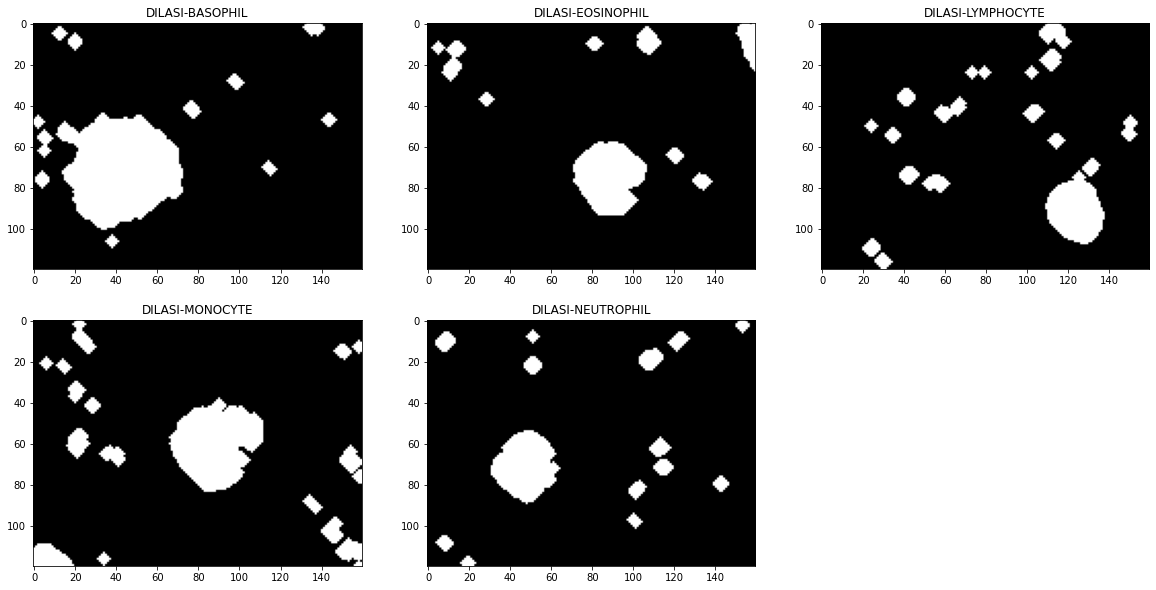

In [62]:
# menampilkan semua citra yang disimpan dalam variabel image6 sampai image10
plt.figure(figsize=(20,10)) # mengatur ukuran dari tampilan citra
plt.subplot(231) # mengatur posisi dari penampilan citra yaitu elemen ke 1 dari tabel 1baris dengan 5kolom
plt.title("DILASI-BASOPHIL") # memberikan judul pada citra yang akan di tampilkan yaitu dengan judul "DILASI-BASOPHIL"
plt.imshow(image6,"gray") # menampilkan image6 dengan cmap "gray"
plt.subplot(232) # mengatur posisi dari penampilan citra yaitu elemen ke 2 dari tabel 1baris dengan 5kolom
plt.title("DILASI-EOSINOPHIL")
plt.imshow(image7,"gray") # menampilkan image7 dengan cmap "gray"
plt.subplot(233) # mengatur posisi dari penampilan citra yaitu elemen ke 3 dari tabel 1baris dengan 5kolom
plt.title("DILASI-LYMPHOCYTE")
plt.imshow(image8,"gray") # menampilkan image8 dengan cmap "gray"
plt.subplot(234) # mengatur posisi dari penampilan citra yaitu elemen ke 4 dari tabel 1baris dengan 5kolom
plt.title("DILASI-MONOCYTE") 
plt.imshow(image9,"gray") # menampilkan image9 dengan cmap "gray"
plt.subplot(235) # mengatur posisi dari penampilan citra yaitu elemen ke 5 dari tabel 1baris dengan 5kolom
plt.title("DILASI-NEUTROPHIL")
plt.imshow(image10,"gray") # menampilkan image10 dengan cmap "gray"

In [63]:
# baris code dibawah ini digunakan untuk mendeklarasikan fungsi erosi yang akan digunakan untuk melakukan proses erosi pada image
def erosi(image,kernel): # baris code ini adalah deklarasi nama fungsi dan parameter input yang dibutuhkan untuk menghasilkan output
                            # dimana input yang dibutuhkan adalah image (yang akan di dierosi) dan kernel untuk melakukan proses erosi
    pdImage=np.pad(image,int(kernel.shape[0]/2)) # baris code untuk membuat image baru dengan nama "pdImage" dimana isinya adalah
                                                 # gambar yang akan di erosi yang sudah diberi padding seukuran setengah panjng kernel
    Image_baru=np.zeros(image.shape) # baris code untuk membuat sebuah citra dengan nilai 0 dan ukuran sesuai image yang akan dierosi.
                                    # citra ini akan digunakan untuk menampung hasil erosi dari image
    y,x=image.shape # baris code untuk mengambil ukuran image dan menyimpannya dalam variebel y dan x
    for i in range (y): # perulangan sebanyak y(sejumlah baris image) untuk mengunjungi semua baris pada image
        for j in range (x): # perulangan sebanyak x(sejumlah kolom image) untuk mengunjungi semua kolom pada image
            cek="true" # menyiapkan variabel cek bernilai true yang akan digunakan untuk mengecek apakah semua pixel 1 pada kernel
                       # Menimpa pixel 1 pada pdImage
            for k in range (kernel.shape[0]): # melakukan perulangan untuk mengunjungi setiap baris kernel
                for l in range (kernel.shape[1]): # melakukan perulangan untuk mengunjungi setiap kolom kernel
                    if int(kernel[k][l])==1: # mengecek apakah kernel yang dikunjungi bernilai 1, jika bernilai 1 lakukan pengecekan terhadap pixel yang ditimpa
                        if pdImage[k+i][j+l]==1: # jika image yang ditimpa ternyata bernilai 1 maka cek akan tetap bernilai "true"
                                                 # dan lanjutkan looping(perulangan)
                            cek="true"
                        else:
                            # jika image yang ditimpa tidak bernilai 1(artinya struktur elemen keluar dari objek) maka atur cek menjadi false dan break perulangan kolom
                            cek="false"
                            break;
                # selanjutnya setelah keluar dari perulangan lakukan pengecekan apakah cek bernilai "false", jika false maka break perulangan baris
                if cek=="false":
                    break;
            # selanjutnya keluar dari perulangan kolom, lakukan pengecekan terhadap variabel cek, jika bernilai "true" maka semua
            # pixel 1 pada kernel menimpa pixel 1 pada image dan pixel yang ditimpa pusat kernel diberi nilai 1
            if cek=="true":
                Image_baru[int(int(kernel.shape[0])/2)+i-1][int(int(kernel.shape[1])/2)+j-1]=1
    return Image_baru # mengembalikan nilai Image_baru sebagai output dari fungsi erosi

In [64]:
# memanggil fungsi erosi yang sudah dideklarasikan untuk melakukan erosi pada image1 sampai image5 dan selanjutnya
# akan disimpan dalam image6-image10
image6=erosi(image1,kernel)
image7=erosi(image2,kernel)
image8=erosi(image3,kernel)
image9=erosi(image4,kernel)
image10=erosi(image5,kernel)

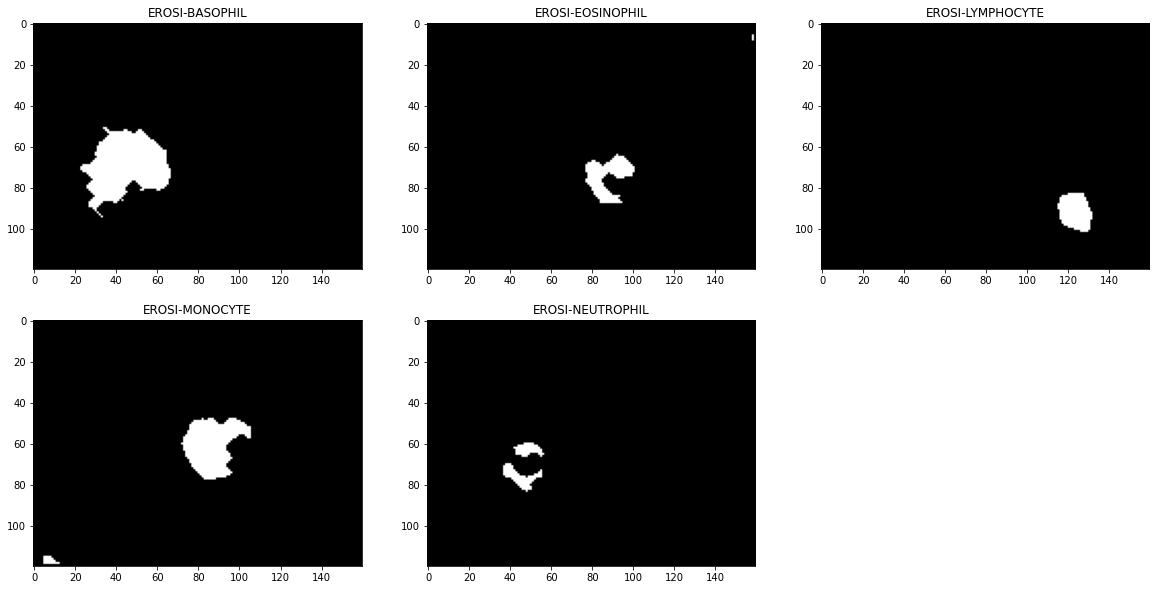

In [65]:
# menampilkan semua citra yang disimpan dalam variabel image6 sampai image10
plt.figure(figsize=(20,10)) # mengatur ukuran dari tampilan citra
plt.subplot(231) # mengatur posisi dari penampilan citra yaitu elemen ke 1 dari tabel 1baris dengan 5kolom
plt.title("EROSI-BASOPHIL") # memberikan judul pada citra yang akan di tampilkan yaitu dengan judul "EROSI-BASOPHIL"
plt.imshow(image6,"gray") # menampilkan image6 dengan cmap "gray"
plt.subplot(232) # mengatur posisi dari penampilan citra yaitu elemen ke 2 dari tabel 1baris dengan 5kolom
plt.title("EROSI-EOSINOPHIL")
plt.imshow(image7,"gray") # menampilkan image7 dengan cmap "gray"
plt.subplot(233) # mengatur posisi dari penampilan citra yaitu elemen ke 3 dari tabel 1baris dengan 5kolom
plt.title("EROSI-LYMPHOCYTE")
plt.imshow(image8,"gray") # menampilkan image8 dengan cmap "gray"
plt.subplot(234) # mengatur posisi dari penampilan citra yaitu elemen ke 4 dari tabel 1baris dengan 5kolom
plt.title("EROSI-MONOCYTE") 
plt.imshow(image9,"gray") # menampilkan image9 dengan cmap "gray"
plt.subplot(235) # mengatur posisi dari penampilan citra yaitu elemen ke 5 dari tabel 1baris dengan 5kolom
plt.title("EROSI-NEUTROPHIL")
plt.imshow(image10,"gray") # menampilkan image10 dengan cmap "gray"

In [66]:
# baris code dibawah ini digunakan untuk mendeklarasikan fungsi opening yang akan digunakan untuk melakukan proses opening pada image
def opening(image,kernel): # baris code ini adalah deklarasi nama fungsi dan parameter input yang dibutuhkan untuk menghasilkan output
                            # dimana input yang dibutuhkan adalah image (yang akan di opening) dan kernel untuk melakukan proses closing
    return dilasi(erosi(image,kernel),kernel) # mengembalikan nilai hasil dilasi dari hasil erosi dari image dengan "kernel"

In [67]:
# memanggil fungsi opening yang sudah dideklarasikan untuk melakukan opening pada image1 sampai image5 dan selanjutnya
# akan disimpan dalam image6-image10
image6=opening(image1,kernel)
image7=opening(image2,kernel)
image8=opening(image3,kernel)
image9=opening(image4,kernel)
image10=opening(image5,kernel)

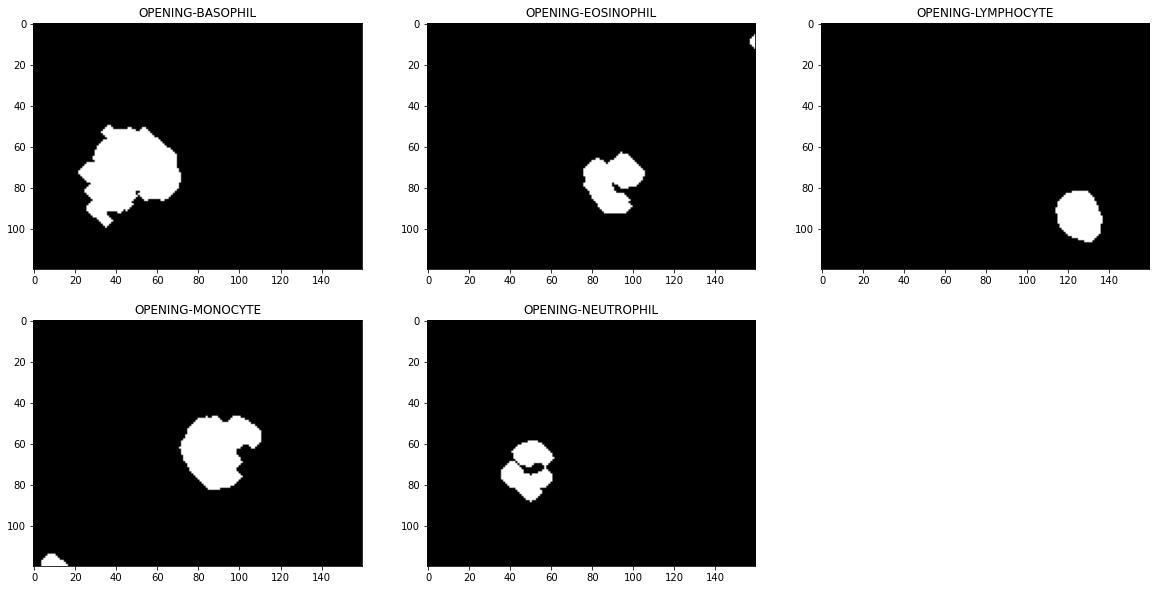

In [68]:
# menampilkan semua citra yang disimpan dalam variabel image6 sampai image10
plt.figure(figsize=(20,10)) # mengatur ukuran dari tampilan citra
plt.subplot(231) # mengatur posisi dari penampilan citra yaitu elemen ke 1 dari tabel 1baris dengan 5kolom
plt.title("OPENING-BASOPHIL") # memberikan judul pada citra yang akan di tampilkan yaitu dengan judul "OPENING-BASOPHIL"
plt.imshow(image6,"gray") # menampilkan image6 dengan cmap "gray"
plt.subplot(232) # mengatur posisi dari penampilan citra yaitu elemen ke 2 dari tabel 1baris dengan 5kolom
plt.title("OPENING-EOSINOPHIL")
plt.imshow(image7,"gray") # menampilkan image7 dengan cmap "gray"
plt.subplot(233) # mengatur posisi dari penampilan citra yaitu elemen ke 3 dari tabel 1baris dengan 5kolom
plt.title("OPENING-LYMPHOCYTE")
plt.imshow(image8,"gray") # menampilkan image8 dengan cmap "gray"
plt.subplot(234) # mengatur posisi dari penampilan citra yaitu elemen ke 4 dari tabel 1baris dengan 5kolom
plt.title("OPENING-MONOCYTE") 
plt.imshow(image9,"gray") # menampilkan image9 dengan cmap "gray"
plt.subplot(235) # mengatur posisi dari penampilan citra yaitu elemen ke 5 dari tabel 1baris dengan 5kolom
plt.title("OPENING-NEUTROPHIL")
plt.imshow(image10,"gray") # menampilkan image10 dengan cmap "gray"

In [69]:
# baris code dibawah ini digunakan untuk mendeklarasikan fungsi closing yang akan digunakan untuk melakukan proses closing pada image
def closing(image,kernel): # baris code ini adalah deklarasi nama fungsi dan parameter input yang dibutuhkan untuk menghasilkan output
                            # dimana input yang dibutuhkan adalah image (yang akan di diclosing) dan kernel untuk melakukan proses closing
    return erosi(dilasi(image,kernel),kernel) # mengembalikan nilai hasil erosi dari hasil dilasi dari image dengan "kernel"

In [70]:
# memanggil fungsi closing yang sudah dideklarasikan untuk melakukan closing pada image1 sampai image5 dan selanjutnya
# akan disimpan dalam image6-image10
image6=closing(image1,kernel)
image7=closing(image2,kernel)
image8=closing(image3,kernel)
image9=closing(image4,kernel)
image10=closing(image5,kernel)

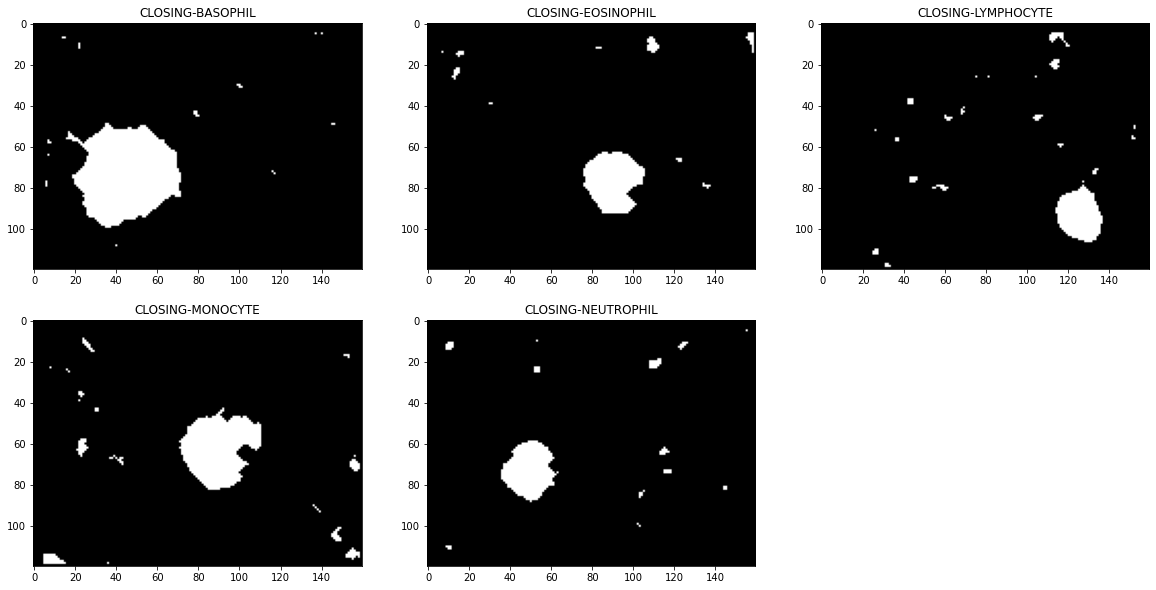

In [71]:
# menampilkan semua citra yang disimpan dalam variabel image6 sampai image10
plt.figure(figsize=(20,10)) # mengatur ukuran dari tampilan citra
plt.subplot(231) # mengatur posisi dari penampilan citra yaitu elemen ke 1 dari tabel 1baris dengan 5kolom
plt.title("CLOSING-BASOPHIL") # memberikan judul pada citra yang akan di tampilkan yaitu dengan judul "CLOSING-BASOPHIL"
plt.imshow(image6,"gray") # menampilkan image6 dengan cmap "gray"
plt.subplot(232) # mengatur posisi dari penampilan citra yaitu elemen ke 2 dari tabel 1baris dengan 5kolom
plt.title("CLOSING-EOSINOPHIL")
plt.imshow(image7,"gray") # menampilkan image7 dengan cmap "gray"
plt.subplot(233) # mengatur posisi dari penampilan citra yaitu elemen ke 3 dari tabel 1baris dengan 5kolom
plt.title("CLOSING-LYMPHOCYTE")
plt.imshow(image8,"gray") # menampilkan image8 dengan cmap "gray"
plt.subplot(234) # mengatur posisi dari penampilan citra yaitu elemen ke 4 dari tabel 1baris dengan 5kolom
plt.title("CLOSING-MONOCYTE") 
plt.imshow(image9,"gray") # menampilkan image9 dengan cmap "gray"
plt.subplot(235) # mengatur posisi dari penampilan citra yaitu elemen ke 5 dari tabel 1baris dengan 5kolom
plt.title("CLOSING-NEUTROPHIL")
plt.imshow(image10,"gray") # menampilkan image10 dengan cmap "gray"

In [72]:
# KESIMPULAN
# 1. Proses dilasi digunakan untuk memperbesar objek2 dalam citra dengan kernel tertentu. proses ini dapat menghasilkan citra yang
#    (bisa dikatakan lebih jelas) objek-objek kecil akan diperbesar dengan kernel (structuring elemen).
# 2. Proses erosi digunakan untuk memperkecil objek2 dalam citra dengan kernel tertentu. proses ini akan mengakibatkan objek dalam 
#    citra terkikis. selain itu, proses ini juga dapat menghilangkan titik-titik kecil (noise) tergantung bentuk dan ukuran kernel yang digunakan
# 3. Opesi Opening dapat menghilangkan objek-objek kecil dalam citra,dapat memecah objek yang tidak seutuhnya menyatu
# 4. Operasi Closing dapat menggabungkan objek-objek yang berdekatan dan mengisi lubang-lubang kecil pada citra